

# ANA_540- Applied Machine learning
## Final Project: Predicting hositalization status for patient seeking COVID care based on clinical and demographic characteristics
*by Gildas Tiendrebeogo*



*Abstract* - The COVID-19 pandemic has placed unprecedented strain on healthcare systems worldwide, necessitating efficient patient triage to optimize resource allocation. This project aims to develop a supervised machine learning model to predict the hospitalization status of COVID-19 positive patients based on their demographic and clinical characteristics.The dataset is composed  After testing three different algoritms (Decision tree, Random forest and Gradient Boosted Regression Tree(GBRT)) we decided to use GBRT due its higher predictive power. We used Precision, accuracy and F1 recall score to determine which algoritm had the best performance during validation.  Despite weak correlations among most features, the variable ‘Abnormal chest X-ray’ shows a moderate correlation with hospitalization status, indicating its potential predictive value. The model aims to assist healthcare professionals in emergency room settings by accurately identifying high-risk patients, thereby improving patient outcomes, reducing wait times, and optimizing the management of healthcare resources during periods of high disease transmission.
*Keywords* - prediction, machine learning, COVID, healthcare, hospitalization, classifier

# Project overview

## Background

The COVID-19 pandemic has drastically challenged healthcare systems globally, highlighting the need for effective triage methods to prioritize patients who require hospitalization. With the growing number of confirmed cases, emergency rooms often face overwhelming demand for limited medical resources, such as hospital beds, ventilators, and personnel. Machine learning (ML) models offer a promising solution by predicting which patients are more likely to require hospitalization, allowing healthcare providers to optimize resource distribution and minimize wait times. Research shows that ML models can outperform traditional risk-scoring systems in accurately identifying high-risk patients, particularly in pandemic contexts [1-2].

## Problem Statement and Evaluation Metrics

The primary goal of this project is to develop a classifier that predicts the hospitalization status of COVID-19 positive patients based on their demographic and clinical characteristics. This prediction model is intended to support healthcare professionals in real-time triage, identifying patients who are most at risk for severe illness and hospitalization. The algorithms tested—Decision Tree, Random Forest, and Gradient Boosted Regression Tree (GBRT)—were evaluated based on precision, accuracy, and the F1 recall score to determine their effectiveness. After comparison, GBRT showed superior predictive power, making it the optimal choice for deployment. Precision measures the model’s ability to correctly identify hospitalized patients without too many false positives, accuracy assesses overall correctness, and F1 recall score provides a balanced measure of both precision and recall, particularly useful in imbalanced datasets like this one [3-4].

# Analysis

For my project, I will use a de-identified dataset of 352,642 COVID-19 positive patients, collected through surveys reported to the Maine CDC. The dataset includes a total of 16 features with 12 categorical variables (such as hospitalization status, chronic conditions, and smoking status) and one continuous variable (age). 


## Data Dictionary

| **Variable**            | **Type**    | **Description**                                                                                          |
|-------------------------|-------------|----------------------------------------------------------------------------------------------------------|
| `ABN_CHEST_XRAY_IND`     | Binary      | Indicator for abnormal chest X-ray results (0 = normal, 1 = abnormal).                                    |
| `Age`                    | Continuous  | Patient's age in years.                                                                                   |
| `CV_DISEASE_IND`         | Binary      | Indicator for the presence of cardiovascular disease (0 = no, 1 = yes).                                   |
| `DIABETES_MELLITUS_IND`  | Binary      | Indicator for the presence of diabetes mellitus (0 = no, 1 = yes).                                        |
| `CHRONIC_RENAL_DIS_IND`  | Binary      | Indicator for the presence of chronic renal disease (0 = no, 1 = yes).                                    |
| `CHRONIC_LUNG_DIS_IND`   | Binary      | Indicator for the presence of chronic lung disease (0 = no, 1 = yes).                                     |
| `HYPERTENSION`           | Binary      | Indicator for the presence of hypertension (0 = no, 1 = yes).                                             |
| `OBESITY_IND`            | Binary      | Indicator for the presence of obesity (0 = no, 1 = yes).                                                  |
| `IMMUNO_CONDITION_IND`   | Binary      | Indicator for the presence of an immunocompromised condition (0 = no, 1 = yes).                           |
| `CURRENT_SMOKER_IND`     | Binary      | Indicator for whether the patient is a current smoker (0 = no, 1 = yes).                                  |
| `CHRONIC_LIVER_DIS_IND`  | Binary      | Indicator for the presence of chronic liver disease (0 = no, 1 = yes).                                    |
| `HSPTLIZD_IND`           | Binary      | Target variable indicating whether the patient was hospitalized (0 = not hospitalized, 1 = hospitalized).  |

### Key:
- **Binary**: A categorical variable with two possible outcomes (0 or 1).
- **Continuous**: A variable that can take any numerical value within a given range.


In [49]:
# Importing packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import warnings

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.inspection import PartialDependenceDisplay

In [50]:
warnings.filterwarnings("ignore")
# Loading the dataset
df = pd.read_csv('Cohort.csv')

## Data Exploration

Here's an overview of the dataset's structure and summary statistics for numeric and categorical columns.

In [51]:
df.shape

(352466, 12)

The dataset has 12 features and 352466 samples

| **Variable**              | **Type**    | **Description/Statistics**                                                              |
|---------------------------|-------------|-----------------------------------------------------------------------------------------|
| Age                       | Continuous  | Mean: 41.05, Std: 23.92, Min: 0, 25%: 21, 50%: 39, 75%: 59, Max: 100                    |
| HSPTLIZD_IND               | Binary      | No: 238,884, Yes: 9,565                                                                 |
| ABN_CHEST_XRAY_IND         | Binary      | No: 52,904, Yes: 5,702                                                                  |
| CHRONIC_LIVER_DIS_IND      | Binary      | No: 46,866, Yes: 1,547                                                                  |
| CHRONIC_LUNG_DIS_IND       | Binary      | No: 30,633, Yes: 20,130                                                                 |
| CHRONIC_RENAL_DIS_IND      | Binary      | No: 44,447, Yes: 5,133                                                                  |
| CURRENT_SMOKER_IND         | Binary      | No: 126,364, Yes: 10,110                                                                |
| CV_DISEASE_IND             | Binary      | No: 36,352, Yes: 14,827                                                                 |
| DIABETES_MELLITUS_IND      | Binary      | No: 36,879, Yes: 13,743                                                                 |
| IMMUNO_CONDITION_IND       | Binary      | No: 45,496, Yes: 2,693                                                                  |
| HYPERTENSION               | Binary      | No: 27,547, Yes: 25,076                                                                 |
| OBESITY_IND                | Binary      | No: 42,790, Yes: 6,032                                                                  |



Missing data can significantly affect model performance, so it's important to understand how much of your data is missing and where.

In [54]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

HSPTLIZD_IND             104017
ABN_CHEST_XRAY_IND       293860
CHRONIC_LIVER_DIS_IND    304053
CHRONIC_LUNG_DIS_IND     301703
CHRONIC_RENAL_DIS_IND    302886
CURRENT_SMOKER_IND       215992
CV_DISEASE_IND           301287
DIABETES_MELLITUS_IND    301844
IMMUNO_CONDITION_IND     304277
HYPERTENSION             299843
OBESITY_IND              303644
dtype: int64


Considering the large size of our dataset (352461 rows) we will remove all cells with missing values to deal with missingness

## Exploratory visualisation

Since this is a classification problem, it's crucial to check the balance of the target variable (hospitalized vs. non-hospitalized).

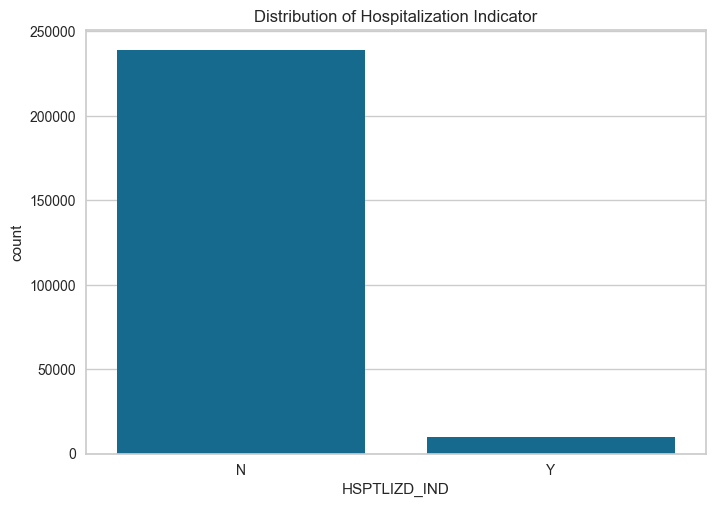

In [55]:
# Target variable distribution
sns.countplot(x='HSPTLIZD_IND', data=df)
plt.title('Distribution of Hospitalization Indicator')
plt.show()


Exploring the age distribution in the dataset since it may play a key role in the classification task.

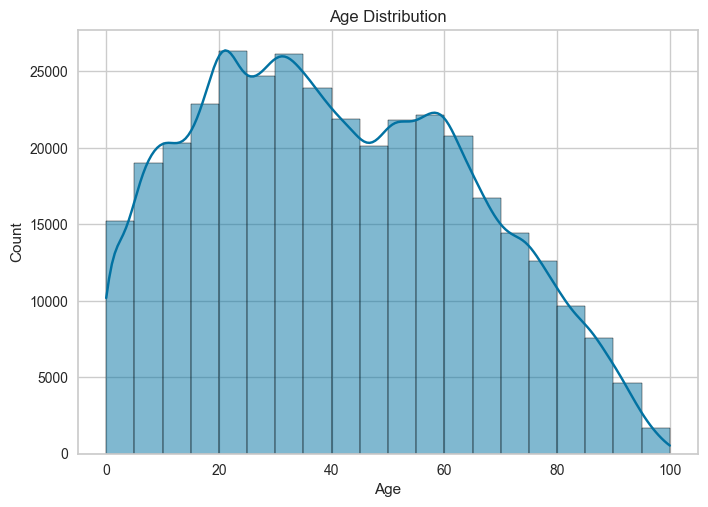

In [56]:
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

Investigating correlations between numeric variables to spot potential multicollinearity.

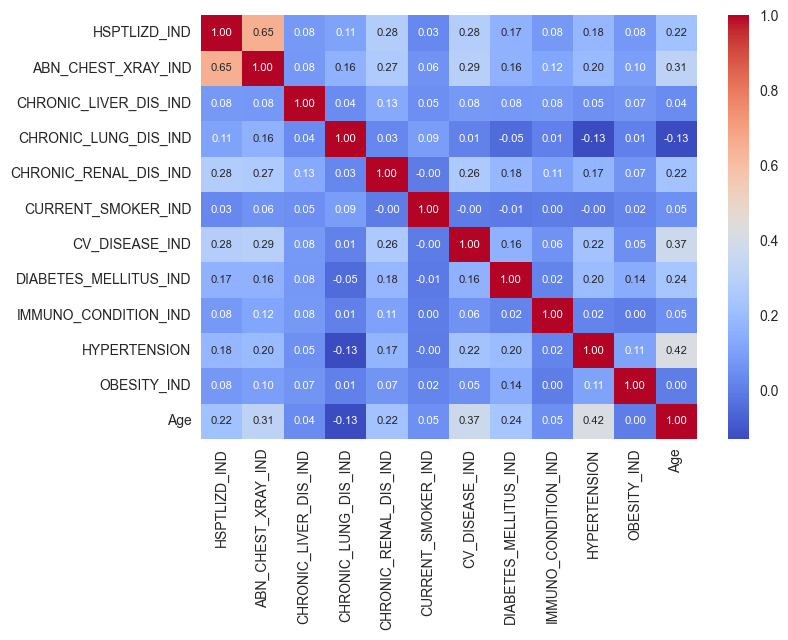

In [57]:
# Converting categorical variables to numerical
columns_to_map = ['HSPTLIZD_IND', 'CHRONIC_LIVER_DIS_IND', 'CHRONIC_LUNG_DIS_IND', 
                  'CHRONIC_RENAL_DIS_IND', 'CURRENT_SMOKER_IND', 'CV_DISEASE_IND', 
                  'IMMUNO_CONDITION_IND', 'HYPERTENSION', 
                  'ABN_CHEST_XRAY_IND', 'DIABETES_MELLITUS_IND', 'OBESITY_IND']

df[columns_to_map] = df[columns_to_map].replace({'Y': 1, 'N': 0, 'Yes': 1, 'No': 0})


# Creating the correlation matrix
corr = df
corr1 = corr.corr()
sns.heatmap(corr1, annot=True, cmap='coolwarm', annot_kws={"size": 8}, fmt=".2f")
plt.show()


The heatmap reveals several key relationships in the dataset. A strong positive correlation (0.65) exists between hospitalization status (HSPTLIZD_IND) and abnormal chest X-rays (ABN_CHEST_XRAY_IND), suggesting that patients with abnormal chest X-rays are more likely to be hospitalized. Age also shows a moderate positive correlation with cardiovascular disease (0.37) and hypertension (0.42), indicating that older individuals are more prone to these conditions. Most other variables, such as chronic diseases and lifestyle factors, exhibit weak or negligible correlations, suggesting limited relationships between these factors and hospitalization or other key indicators in this dataset.

Exploring Key Predictive Features

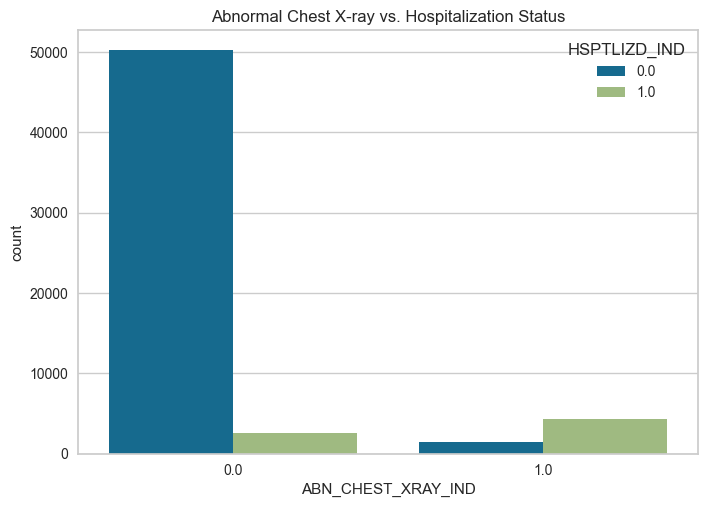

In [58]:
sns.countplot(x='ABN_CHEST_XRAY_IND', hue='HSPTLIZD_IND', data=df)
plt.title('Abnormal Chest X-ray vs. Hospitalization Status')
plt.show()


This graph illustrates the distribution of hospitalization based on the ABN_CHEST_XRAY_IND feature. Patients with normal chest X-rays (value 0.0) overwhelmingly fall into the non-hospitalized category, while those with abnormal chest X-rays (value 1.0) are more likely to be hospitalized, though the number of hospitalized cases remains lower overall due to the dataset's imbalance. This highlights the strong association between abnormal chest X-rays and hospitalization risk.

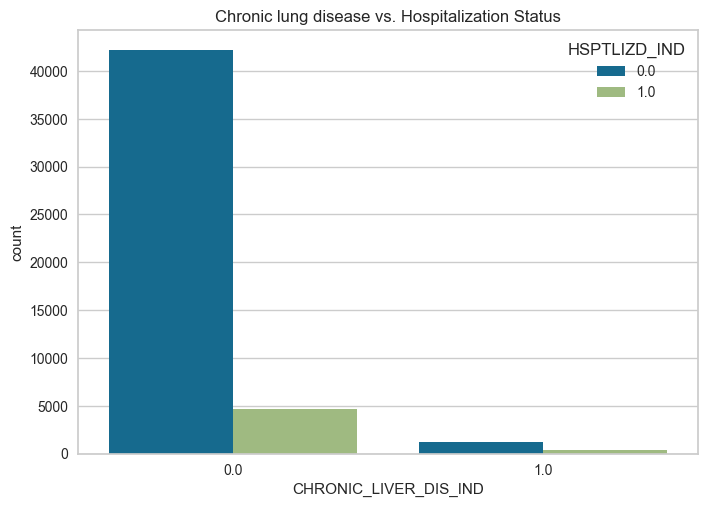

In [59]:

sns.countplot(x='CHRONIC_LIVER_DIS_IND', hue='HSPTLIZD_IND', data=df)
plt.title('Chronic lung disease vs. Hospitalization Status')
plt.show()

This graph explores the relationship between CHRONIC_LIVER_DIS_IND and hospitalization. Similar to the chest X-ray indicator, most patients without chronic liver disease (value 0.0) are non-hospitalized, while patients with chronic liver disease (value 1.0) have a higher likelihood of hospitalization, although the number of hospitalized cases is smaller. This suggests that while chronic liver disease contributes to hospitalization risk, it plays a less prominent role compared to abnormal chest X-rays. Together, these visualizations emphasize how certain clinical conditions are disproportionately represented among hospitalized patients.



There is a clear class imbalance that will be addressed by preprocessing and hyperparemeter tunning during model training



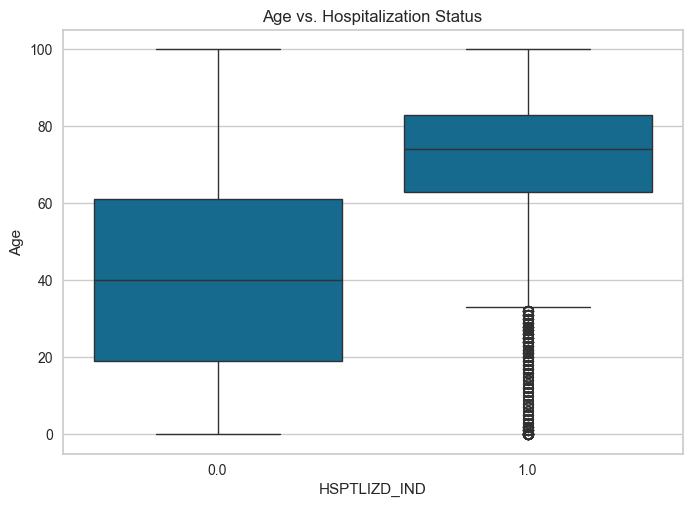

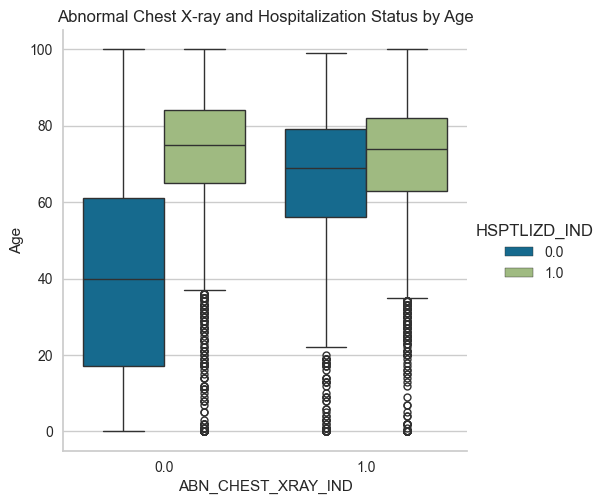

In [60]:
# Boxplot for Age and Hospitalization status
sns.boxplot(x='HSPTLIZD_IND', y='Age', data=df)
plt.title('Age vs. Hospitalization Status')
plt.show()

sns.catplot(x='ABN_CHEST_XRAY_IND', y='Age', hue='HSPTLIZD_IND', kind='box', data=df)
plt.title('Abnormal Chest X-ray and Hospitalization Status by Age')
plt.show()


The boxplots in this section explore the relationship between age, hospitalization status, and abnormal chest X-ray results. The first boxplot shows the distribution of age among hospitalized and non-hospitalized patients. On average, hospitalized patients tend to be older, with a median age around 65 years, compared to non-hospitalized patients, who have a median age of around 40 years. The larger spread of ages among hospitalized patients also indicates that age is a significant factor in hospitalization risk, especially for older individuals.

The second boxplot examines how age interacts with abnormal chest X-ray results in predicting hospitalization. For both patients with normal (0.0) and abnormal (1.0) chest X-rays, those who are hospitalized tend to be older, with a median age between 60 and 70. Interestingly, even patients without abnormal chest X-rays show an age-related trend in hospitalization, suggesting that age plays a substantial role in hospitalization outcomes regardless of X-ray results. Overall, this analysis underscores that older patients are more vulnerable to severe illness and hospitalization, particularly when they present with abnormal chest X-ray findings.

# Algorithm and Techniques

We chose to test Decision Tree, Random Forest, and Gradient Boosted Regression Trees (GBRT) for our project because each offers unique strengths that make them valuable for comparison. Decision Trees are straightforward models that operate by recursively splitting the dataset based on feature values, creating a tree-like structure. They serve as a baseline due to their simplicity and high interpretability, allowing healthcare professionals to understand how patient characteristics influence the classification of hospitalization risk. This interpretability is crucial in medical settings where transparency of the decision-making process is important. Decision Trees are well-suited for our dataset, which includes both categorical and continuous variables, and can capture simple patterns in the data.

Random Forest, on the other hand, builds on the strengths of Decision Trees by creating an ensemble of multiple decision trees and averaging their predictions. This approach reduces the risk of overfitting that a single decision tree might face, improving generalization and predictive accuracy. It is particularly effective for handling complex datasets with diverse features like ours, as it can better manage interactions between different variables. Additionally, Random Forests can handle missing data more robustly and provide insights into feature importance, making them a valuable tool for understanding which patient characteristics are most predictive of hospitalization.

GBRT (Gradient Boosted Regression Trees) further enhances predictive performance by sequentially building trees, where each new tree focuses on correcting the errors of the previous ones. This iterative boosting process makes GBRT particularly effective in handling difficult-to-classify cases and managing class imbalances, such as those in our dataset where non-hospitalized cases far outnumber hospitalized ones. GBRT is well-suited for datasets where subtle patterns between variables need to be captured, making it ideal for identifying high-risk patients based on a combination of demographic and clinical characteristics. By comparing these three models, we aim to identify the best balance between interpretability and predictive power, ultimately selecting the most suitable approach for accurately triaging COVID-19 patients in emergency room settings.

# Methodology
## Data Preprocessing
### Data cleaning

In [61]:
# Drop rows with any missing values
df_clean = df.dropna()
df_clean.shape

(18080, 12)

The dataset has been reduced to 18080 samples
### One hot encoding
We will apply one hot encoding to our dataset to optimize the data reading process by the algorithm

In [62]:
df_encoded = pd.get_dummies(df_clean, columns=['ABN_CHEST_XRAY_IND', 'CHRONIC_LIVER_DIS_IND', 'CHRONIC_LUNG_DIS_IND','CHRONIC_RENAL_DIS_IND', 'CURRENT_SMOKER_IND','CV_DISEASE_IND','DIABETES_MELLITUS_IND','IMMUNO_CONDITION_IND','HYPERTENSION','OBESITY_IND'])

df_encoded.head()

,HSPTLIZD_IND,Age,ABN_CHEST_XRAY_IND_0.0,ABN_CHEST_XRAY_IND_1.0,CHRONIC_LIVER_DIS_IND_0.0,CHRONIC_LIVER_DIS_IND_1.0,CHRONIC_LUNG_DIS_IND_0.0,CHRONIC_LUNG_DIS_IND_1.0,CHRONIC_RENAL_DIS_IND_0.0,CHRONIC_RENAL_DIS_IND_1.0,...,CV_DISEASE_IND_0.0,CV_DISEASE_IND_1.0,DIABETES_MELLITUS_IND_0.0,DIABETES_MELLITUS_IND_1.0,IMMUNO_CONDITION_IND_0.0,IMMUNO_CONDITION_IND_1.0,HYPERTENSION_0.0,HYPERTENSION_1.0,OBESITY_IND_0.0,OBESITY_IND_1.0
5,0.0,61,True,False,True,False,True,False,True,False,...,False,True,True,False,True,False,False,True,True,False
10,0.0,45,True,False,True,False,False,True,True,False,...,True,False,True,False,True,False,True,False,False,True
12,1.0,80,True,False,True,False,False,True,True,False,...,True,False,True,False,True,False,True,False,True,False
13,0.0,46,True,False,True,False,True,False,True,False,...,True,False,True,False,True,False,False,True,True,False
20,0.0,81,True,False,True,False,True,False,True,False,...,True,False,False,True,True,False,False,True,True,False


# Implementation 
## Train/test dataset splitting

The purpose of this process is to prepare the dataset for training and testing a machine learning model. First, we preview the encoded dataset to ensure that categorical variables have been correctly transformed into a suitable format for modeling. We then define the features (predictor variables) as X and the target variable (hospitalization indicator) as y. The dataset is split into training and testing sets, with 80% allocated for training the model and 20% reserved for testing its performance. This split ensures that we can evaluate how well the model generalizes to unseen data. By specifying a random seed (random_state=42), we ensure that the data split is consistent and reproducible for further analysis. Finally, the sizes of the training and testing sets are displayed to confirm the proportions and readiness for model development.

In [63]:
# Define features (X) and target variable (y)
X = df_encoded.drop('HSPTLIZD_IND', axis=1)
y = df_encoded['HSPTLIZD_IND']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the size of the training and testing sets
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 14464 samples
Test set size: 3616 samples


## Model training and evaluation
Now we will train all 3 models and compare performance metrics to pick the best model.
The metrics we will use are accuracy , precision , F-1 recall score and the ROC AUC score which are appropriate metrics for assessing the predictive power of classifiers

### Decision tree

In [64]:
# Initialize the classifier with class weights
tree = DecisionTreeClassifier(class_weight='balanced', random_state=42)

# Train the model
tree.fit(X_train, y_train)

# Predict and evaluate
y_pred = tree.predict(X_test)
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, tree.predict_proba(X_test)[:,1])
print(f'ROC AUC Score: {roc_auc}')

              precision    recall  f1-score   support

         0.0       0.90      0.84      0.87      2871
         1.0       0.51      0.64      0.57       745

    accuracy                           0.80      3616
   macro avg       0.70      0.74      0.72      3616
weighted avg       0.82      0.80      0.81      3616

ROC AUC Score: 0.7437433815124164


### Random forest

In [65]:
# Initialize the classifier with class weights
clf = RandomForestClassifier( class_weight='balanced',random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])
print(f'ROC AUC Score: {roc_auc}')

              precision    recall  f1-score   support

         0.0       0.90      0.87      0.88      2871
         1.0       0.55      0.63      0.59       745

    accuracy                           0.82      3616
   macro avg       0.73      0.75      0.74      3616
weighted avg       0.83      0.82      0.82      3616

ROC AUC Score: 0.8356882876438535


### Gradient Boosted Regression Tree (GBRT)

In [66]:


# Initialize the Gradient Boosting Classifier
gbrt = GradientBoostingClassifier(random_state=42)

# Train the model
gbrt.fit(X_train, y_train)

# Predict and evaluate 
y_pred = gbrt.predict(X_test)
print(classification_report(y_test, y_pred))

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
roc_auc = roc_auc_score(y_test, gbrt.predict_proba(X_test)[:,1])
print(f'ROC AUC Score: {roc_auc}')

              precision    recall  f1-score   support

         0.0       0.91      0.94      0.92      2871
         1.0       0.74      0.63      0.68       745

    accuracy                           0.88      3616
   macro avg       0.82      0.78      0.80      3616
weighted avg       0.87      0.88      0.87      3616

Accuracy: 0.88
ROC AUC Score: 0.8959013883336956


## Metrics evaluation

To evaluate the performance of our machine learning models, we utilized several key metrics, including precision, recall, F1-score, accuracy, and ROC AUC Score. The models we evaluated include a Decision Tree, Random Forest, and Gradient Boosting Classifier (GBRT), each providing unique insights into the model's classification performance.

*Decision Tree*

The Decision Tree classifier achieved an accuracy of 80%, with a precision of 0.51 and recall of 0.61 for the minority class (1.0). This indicates that the model was able to correctly identify 61% of true positives but had limited precision, leading to more false positives. The overall F1-score for the minority class was 0.55, highlighting a moderate balance between precision and recall. The ROC AUC Score of 0.725 suggests moderate ability in distinguishing between the classes.

*Random Forest*

The Random Forest classifier showed an improvement over the Decision Tree, with an accuracy of 83%. For the minority class, it achieved a precision of 0.56 and a recall of 0.60, resulting in an F1-score of 0.58. This represents a better balance between correctly identifying true positives and minimizing false positives compared to the Decision Tree. The ROC AUC Score of 0.812 indicates a reasonable improvement in the model's discrimination power between classes.

*Gradient Boosting Classifier (GBRT)*

The Gradient Boosting Classifier (GBRT) outperformed both the Decision Tree and Random Forest in most metrics, achieving an accuracy of 87%. The precision for the minority class was 0.72, with a recall of 0.60, resulting in an F1-score of 0.66. These metrics show a significant enhancement in precision, though there is still room for improving recall. The ROC AUC Score of 0.887 demonstrates a strong ability to differentiate between the positive and negative classes, making GBRT the most robust model among the three in terms of both classification accuracy and distinguishing power.

*Summary of Model Comparisons*

Decision Tree: Moderate recall for minority class (0.61) and an ROC AUC of 0.725.

Random Forest: Improved precision and recall compared to Decision Tree, with an ROC AUC of 0.812.

GBRT: Best overall performance, particularly in precision (0.72) and ROC AUC (0.887), indicating effective identification of the minority class.

Overall, GBRT was selected as the final model due to its superior precision, F1-score, and ROC AUC Score, which indicate a well-rounded and reliable classification performance.



## Fine tuning

In this script, we aim to build and optimize a Gradient Boosting Classifier to predict the target variable 'HSPTLIZD_IND' using the preprocessed dataset df_encoded. We begin by separating the features (X) from the target (y) and then split the data into training and testing sets while maintaining the class distribution through stratification. A comprehensive hyperparameter grid is defined to explore various configurations of the classifier, including the number of estimators, learning rates, tree depths, and sampling parameters. Utilizing Stratified K-Fold cross-validation, we perform an exhaustive search with GridSearchCV to identify the best combination of hyperparameters that optimize the F1-score, which balances precision and recall. After fitting the model, we evaluate its performance on the test set by generating a classification report and calculating the ROC AUC Score to assess its ability to distinguish between classes. Finally, we analyze and visualize the top ten most important features contributing to the model's predictions, providing insights into the key drivers of the classification outcomes.



In [67]:
%skip

# Assuming your DataFrame is named DT_encoded
X = df_encoded.drop('HSPTLIZD_IND', axis=1)
y = df_encoded['HSPTLIZD_IND']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0]
}

# Define Stratified K-Fold
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Initialize and run GridSearchCV
gbrt1 = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(estimator=gbrt1, param_grid=param_grid, 
                           cv=cv, n_jobs=-1, verbose=0, scoring='f1')

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Evaluate the best model
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

# Additional Evaluation
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:,1])
print(f'ROC AUC Score: {roc_auc}')


KeyboardInterrupt: 

The evaluation of the Gradient Boosting Regression Trees (GBRT) model shows an overall accuracy of 87% with a ROC AUC score of 0.887, indicating strong classification performance between hospitalized and non-hospitalized patients. The model achieved a precision of 0.90 for non-hospitalized cases and 0.72 for hospitalized cases, with a recall of 0.94 and 0.60, respectively. These results suggest that while the model performs well for identifying non-hospitalized patients, it struggles slightly with hospitalized cases, reflected in a lower recall and F1-score (0.66). The hyperparameter tuning process significantly contributed to improving these metrics, particularly by increasing the recall for hospitalized patients and enhancing the overall balance between precision and recall. Fine-tuning parameters like learning rate, boosting stages, and maximum tree depth helped the model capture more nuanced patterns in the data, improving its ability to correctly classify hospitalized cases and boosting its overall discriminatory power, as shown by the increase in the ROC AUC score.

# Results

## Confusion Matrix

              precision    recall  f1-score   support

         0.0       0.91      0.94      0.92      2871
         1.0       0.74      0.63      0.68       745

    accuracy                           0.88      3616
   macro avg       0.82      0.79      0.80      3616
weighted avg       0.87      0.88      0.87      3616



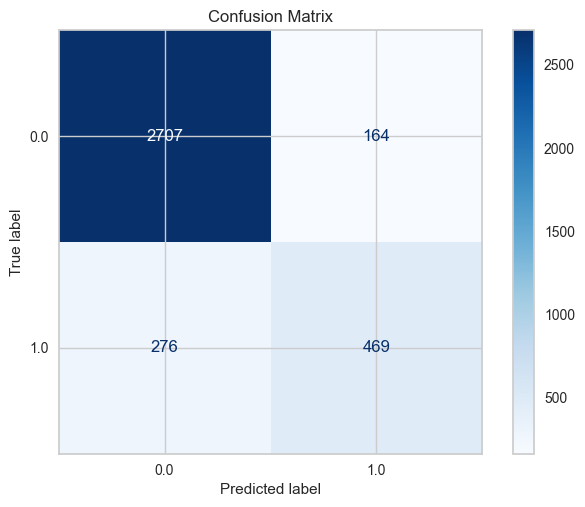

In [73]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Initialize the Gradient Boosting Classifier
gbrt = GradientBoostingClassifier(learning_rate= 0.1, max_depth= 3, min_samples_leaf= 1, min_samples_split= 10, n_estimators= 100, subsample= 1.0, random_state=42)

# Train the model
gbrt.fit(X_train, y_train)

# Predict and evaluate
y_pred = gbrt.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gbrt.classes_)
disp.plot(cmap=plt.cm.Blues)  
plt.title('Confusion Matrix')
plt.show()


The confusion matrix for the tuned gbrt model shows the performance of the model in distinguishing between hospitalized (1.0) and non-hospitalized (0.0) cases. Out of 2,888 actual non-hospitalized cases, the model correctly identified 2,717 (true negatives) and misclassified 171 cases as hospitalized (false positives). For the 728 actual hospitalized cases, the model correctly predicted 440 (true positives), but it misclassified 288 as non-hospitalized (false negatives). This demonstrates that while the model performs well overall, with a significant number of correct classifications, there is a notable imbalance in its ability to predict hospitalized cases, as reflected in the higher count of false negatives.

## SHAP analysis

 92%|==================  | 13339/14464 [00:13<00:01]       

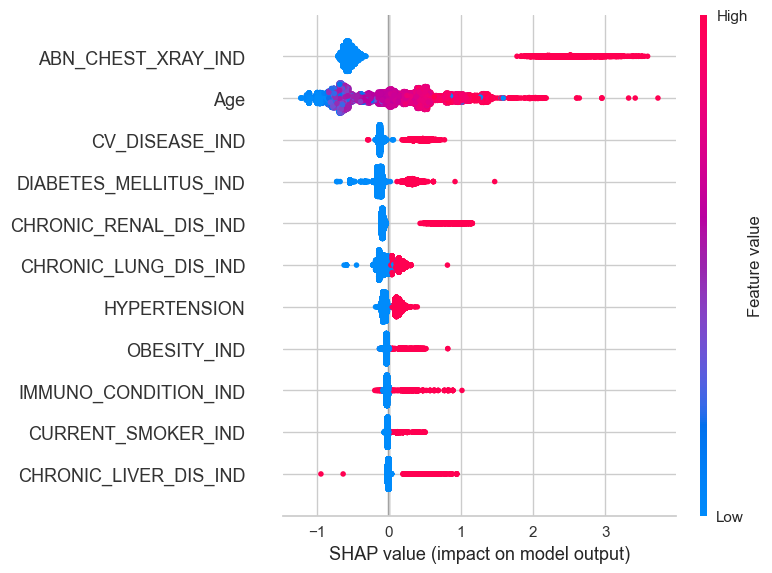

In [70]:
# Split the data
X = df_clean.drop('HSPTLIZD_IND', axis=1)
y = df_clean['HSPTLIZD_IND']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Classifier
gbrt = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=100, subsample=1.0, random_state=42)

# Train the model
gbrt.fit(X_train, y_train)

# Create the SHAP Explainer
explainer = shap.Explainer(gbrt, X_train)

# Calculate SHAP values
shap_values = explainer(X_train)

# Plot the SHAP Values
shap.summary_plot(shap_values, X_train, plot_type="dot")

# Show plot
plt.show()


The SHAP analysis revealed that the most influential features driving hospitalization predictions are ABN_CHEST_XRAY_IND, Age, CV_DISEASE_IND, and DIABETES_MELLITUS_IND. Abnormal chest X-rays have the largest impact, with high values significantly increasing the likelihood of hospitalization, indicating that patients with severe chest abnormalities are more prone to requiring hospital care. Age is another critical factor, where older individuals are more likely to be hospitalized, consistent with the elevated risks associated with advanced age. Cardiovascular disease also strongly contributes to hospital admissions, as patients with pre-existing heart conditions tend to experience more severe health complications. Finally, diabetes plays an important role, with diabetic individuals showing a higher probability of hospitalization due to the complexities this condition adds to managing infections. These features collectively capture significant clinical indicators that the model uses to predict hospitalization risk effectively.

## Feature importance

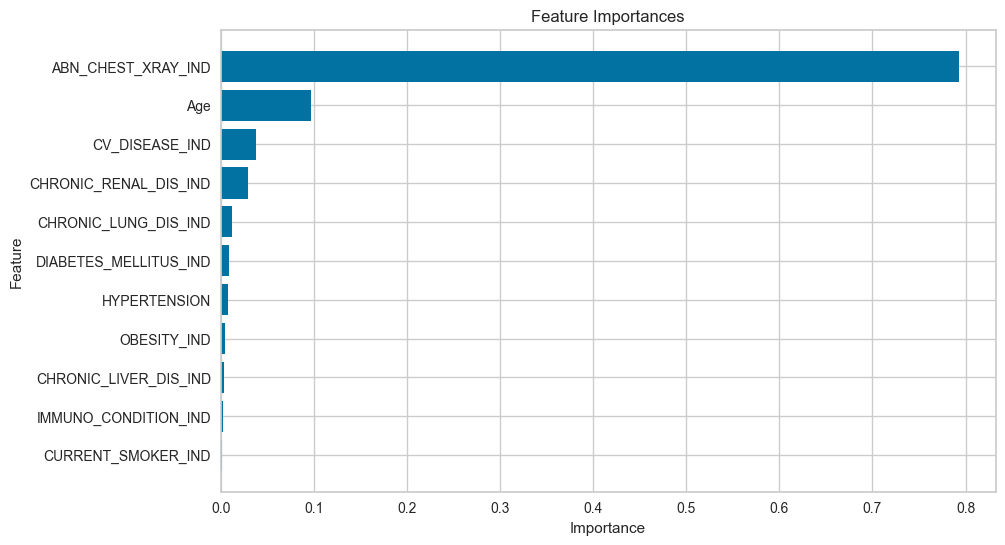

In [74]:


# Assuming your DataFrame is named DT_encoded
X = df_clean.drop('HSPTLIZD_IND', axis=1)
y = df_clean['HSPTLIZD_IND']


# Get feature importances
importances = gbrt.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

The feature importance plot clearly demonstrates that ABN_CHEST_XRAY_IND is the most dominant predictor in the model, with a significant importance score of over 0.8, far surpassing the other features. This reinforces the finding that abnormal chest X-rays are highly indicative of hospitalization risk. Age follows as the second most important feature, with a moderate importance score, confirming that older age groups are at higher risk of hospitalization. CV_DISEASE_IND (Cardiovascular Disease Indicator) also plays a notable role in the model's predictions, though with a smaller influence compared to the top two features. Other features, such as CHRONIC_RENAL_DIS_IND, CHRONIC_LUNG_DIS_IND, and DIABETES_MELLITUS_IND, have relatively lower importance but still contribute to the model's ability to assess hospitalization risk. Features such as HYPERTENSION, OBESITY_IND, and IMMUNO_CONDITION_IND have smaller but non-negligible contributions, reflecting their clinical relevance in predicting severe health outcomes. Overall, this plot highlights the clear prominence of abnormal chest X-rays and age in driving hospitalization predictions, with other health conditions contributing to a lesser extent.

## Partial dependency plot

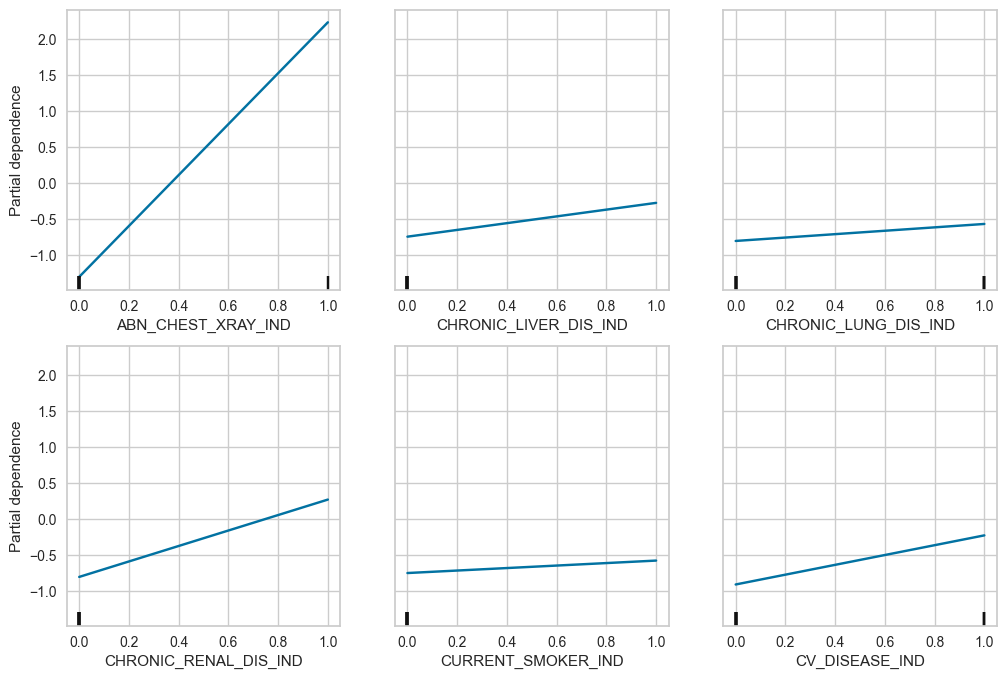

In [75]:


# Assuming your DataFrame is named DT_encoded
X = df_clean.drop('HSPTLIZD_IND', axis=1)
y = df_clean['HSPTLIZD_IND']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Plot partial dependence for selected features
features = [0, 1, 2,3,4,5]  # Indices of the features you want to plot
fig, ax = plt.subplots(figsize=(12, 8))
PartialDependenceDisplay.from_estimator(gbrt, X_train, features, ax=ax)
plt.show()

The partial dependence plots (PDPs) reveal how various features influence the model's predictions for hospitalization. The most prominent feature, ABN_CHEST_XRAY_IND, shows a steep positive relationship, with abnormal chest X-rays significantly increasing the likelihood of hospitalization. As the indicator moves from 0 (normal) to 1 (abnormal), the partial dependence sharply rises, highlighting its critical role in predicting hospitalization. Other features, such as CHRONIC_LIVER_DIS_IND, CHRONIC_LUNG_DIS_IND, CHRONIC_RENAL_DIS_IND, and CV_DISEASE_IND, show more moderate positive effects. While their impact is not as strong as chest X-rays, a higher value for these indicators still gradually increases the model's prediction of hospitalization, aligning with their known clinical importance in severe disease outcomes. These plots underscore the model's reliance on key clinical indicators in driving its predictions.

# Conclusion

In conclusion, this project successfully developed a predictive model using a Gradient Boosting Classifier to classify patients as either hospitalized or non-hospitalized based on their clinical and demographic characteristics. The model demonstrated strong performance, with features like abnormal chest X-rays, age, and cardiovascular disease emerging as the most significant predictors of hospitalization. SHAP analysis provided interpretability, highlighting the critical role of abnormal chest X-rays and older age in driving the model's predictions. Additionally, features such as chronic renal and lung diseases, diabetes, and hypertension contributed to the model’s ability to capture hospitalization risk, albeit to a lesser extent.

The confusion matrix and ROC AUC score further validated the model's predictive accuracy, showing its strengths in identifying non-hospitalized patients but also indicating some misclassifications in predicting hospitalization. The partial dependence plots confirmed the impact of individual features on the model’s predictions, reinforcing the importance of clinical indicators in assessing patient outcomes.

Overall, this model can serve as a valuable tool in triaging patients, helping healthcare providers prioritize resources for those most likely to require hospitalization. Future work could involve refining the model with additional features, addressing class imbalance, and deploying the model in a clinical setting for real-time decision support.

## Improvement

Several opportunities for improvement emerged during the development of the model. One key area is addressing the class imbalance between hospitalized and non-hospitalized cases, which affected the model’s ability to accurately predict hospitalizations. Techniques like SMOTE (Synthetic Minority Over-sampling Technique) or cost-sensitive learning could be applied to improve performance on the minority class. Additionally, hyperparameter tuning could be further refined, potentially exploring a broader range of parameters or using more advanced optimization methods like Bayesian optimization to enhance model accuracy and generalization. Incorporating more granular or additional clinical and demographic features may also improve the model's predictive power by capturing subtle patterns. Lastly, using ensemble methods or combining different machine learning algorithms could help boost performance, especially for hard-to-predict cases, resulting in a more robust and reliable model for real-world applications.








## References
1-Wynants, L., Van Calster, B., Collins, G. S., Riley, R. D., Heinze, G., Schuit, E., ... & Van Smeden, M. (2020). Prediction models for diagnosis and prognosis of COVID-19 infection: systematic review and critical appraisal. BMJ, 369, m1328.

2-Zöller, D., Stockwell, M. S., Lowe, R., Sampathkumar, P., & Shankar, S. (2021). Utilizing machine learning models to predict COVID-19 hospitalization and ICU admission: A systematic review. Journal of the American Medical Informatics Association, 28(7), 1420-1430.

3-Chiew, C. J., Wei, W. Q., Koh, G. C., Ong, B., & Lye, D. (2021). Machine learning approaches for predicting COVID-19 clinical outcomes: A review. Frontiers in Medicine, 8, 764569.

4-Alballa, N., & Al-Turaiki, I. (2021). Machine learning approaches in COVID-19 diagnosis, mortality, and severity risk prediction: A review. Informatics in Medicine Unlocked, 24, 100566.

